In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-hits-spotify-from-20002019/songs_normalize.csv


In [2]:
df=pd.read_csv('/kaggle/input/top-hits-spotify-from-20002019/songs_normalize.csv')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


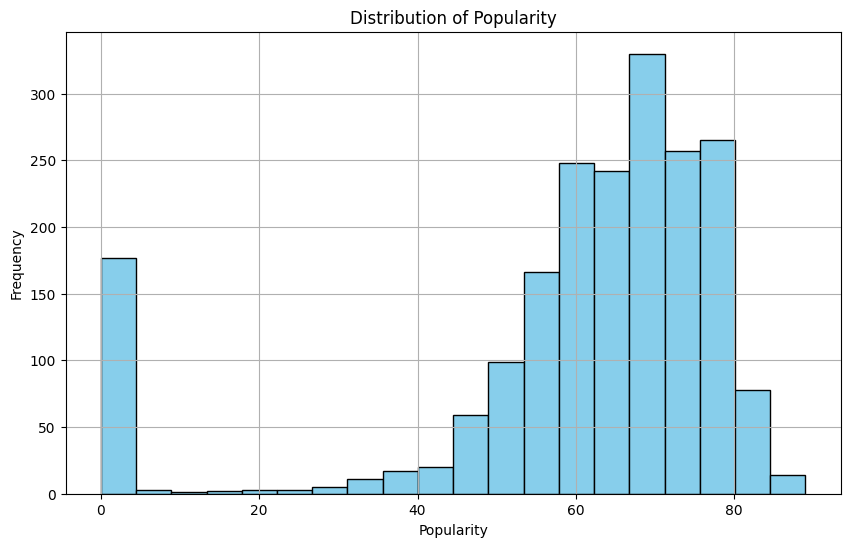

In [3]:
import matplotlib.pyplot as plt

# Histogram of 'popularity' column
plt.figure(figsize=(10, 6))
plt.hist(df['popularity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity')
plt.grid(True)
plt.show()


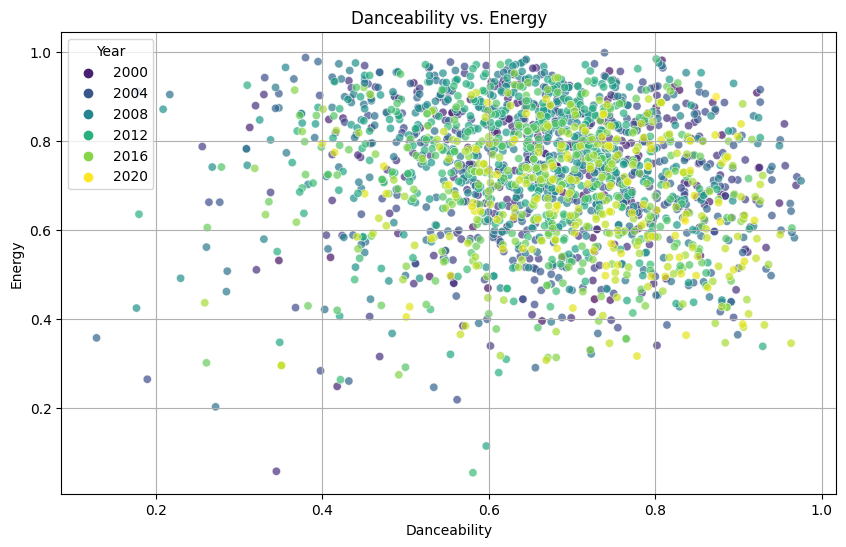

In [4]:
import seaborn as sns

# Scatter plot of 'danceability' vs. 'energy'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='energy', data=df, hue='year', palette='viridis', alpha=0.7)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Danceability vs. Energy')
plt.legend(title='Year')
plt.grid(True)
plt.show()


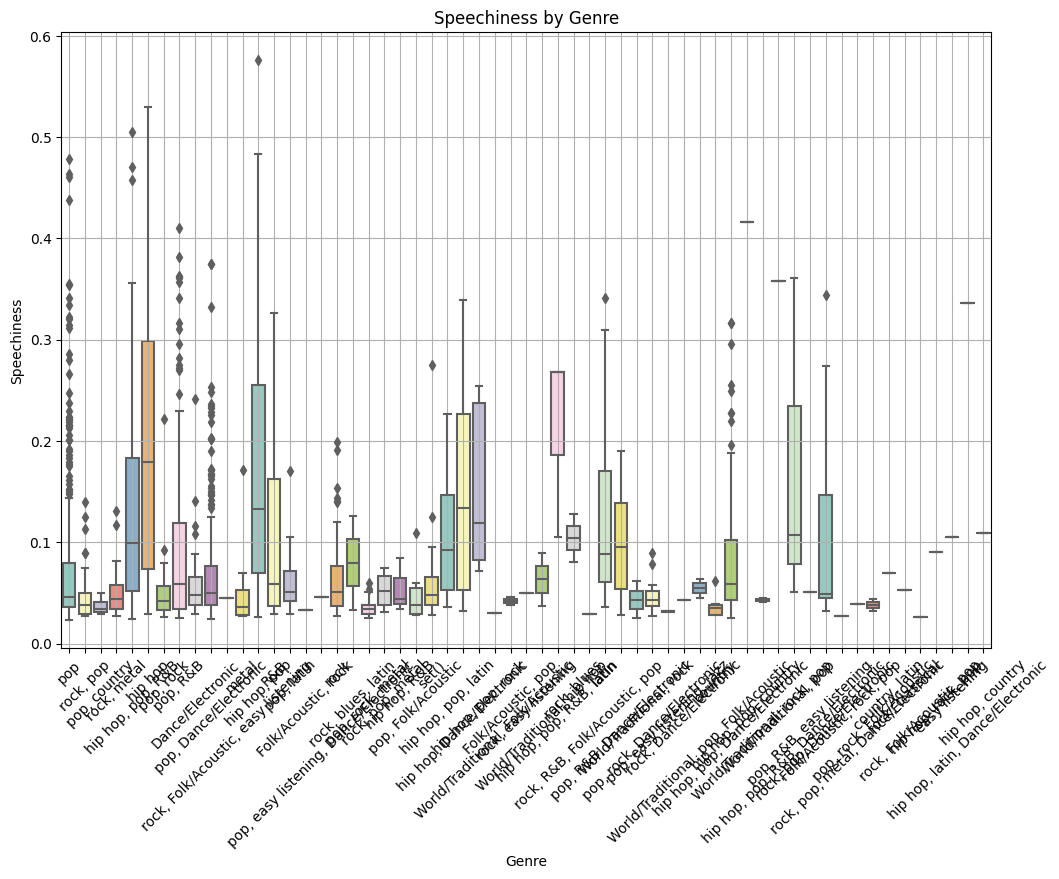

In [5]:
# Box plot of 'speechiness' by 'genre'
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='speechiness', data=df, palette='Set3')
plt.xlabel('Genre')
plt.ylabel('Speechiness')
plt.title('Speechiness by Genre')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


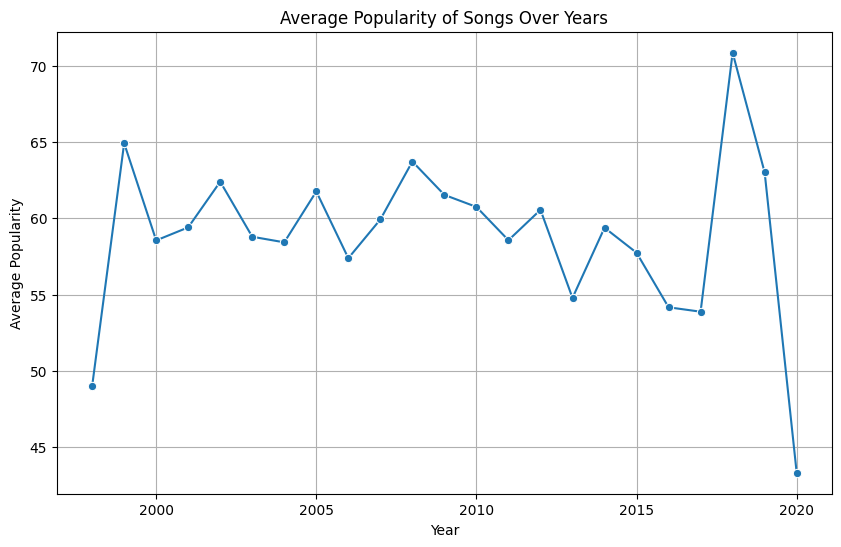

In [6]:
# Group by 'year' and calculate average 'popularity'
average_popularity_by_year = df.groupby('year')['popularity'].mean().reset_index()

# Line plot of average popularity over years
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='popularity', data=average_popularity_by_year, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Songs Over Years')
plt.grid(True)
plt.show()


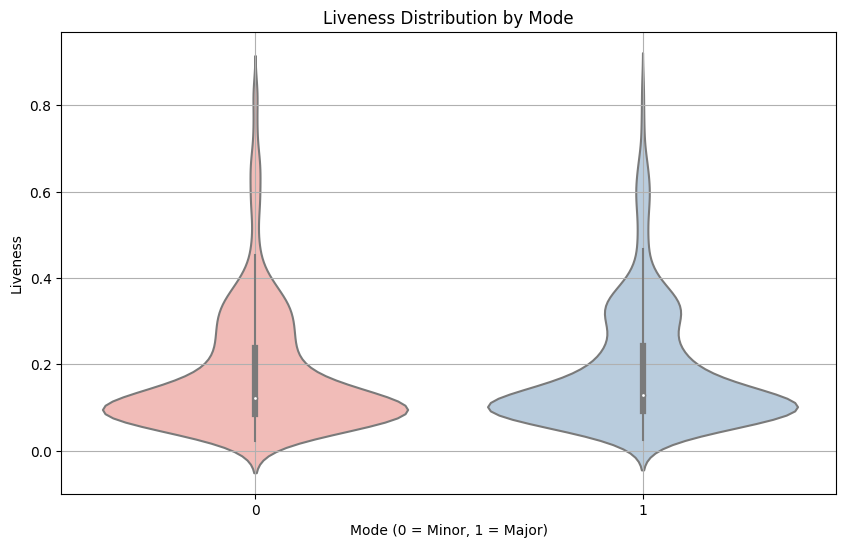

In [7]:
# Violin plot of 'liveness' distribution by 'mode'
plt.figure(figsize=(10, 6))
sns.violinplot(x='mode', y='liveness', data=df, palette='Pastel1')
plt.xlabel('Mode (0 = Minor, 1 = Major)')
plt.ylabel('Liveness')
plt.title('Liveness Distribution by Mode')
plt.grid(True)
plt.show()
